In [2]:
import numpy as np
from numpy import random
import pandas as pd
#import scipy as sp
from scipy import linalg as la
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [38]:
# creating rnd dataset
n = 2000
x1 = random.normal(0,1,n)
x2 = random.normal(0,3,n)
x2 += x1
x3 = 2*x1 + x2
data = np.array([x1,x2,x3])

# covariance matrix
cv = np.cov(data)

# find eingenvectors and eigenvalues with scipy la
l, V = la.eig(cv)
l = np.real_if_close(l)

# find eingenvectors and eigenvalues with SVD
U, s, Vh = la.svd(data)
l_SVD = s**2/(n-1)
V_SVD = U
# solve sequence problem
l_order=l.copy()
l_SVD_order=l_SVD.copy()
l_order.sort()
l_SVD_order.sort()

# Print eigenvalues
print(l_order,'\n',l_SVD_order)
print('Are eigenvalues the same? ',all(np.isclose(l_order,l_SVD_order, rtol=1e-2)))

# The percent of total 
pc1=(l[0])/(np.sum(l))*100.
pc2=(abs(l[1]))/(np.sum(l))*100.
pc3=(l[2])/(np.sum(l))*100.
print('\n','Principal component percent:', pc1,pc2,pc3)

[2.62400844e-17 2.05815797e+00 2.72699018e+01] 
 [3.54061704e-30 2.06105188e+00 2.72787650e+01]
Are eigenvalues the same?  True

 Principal component percent: 92.98229073334005 8.947091849974901e-17 7.0177092666599465


The fact that a component is almost zero makes sense because the feature 'x3' is a linear combination of the first two. In order to reduce dimensionality third feature can jut be removed.

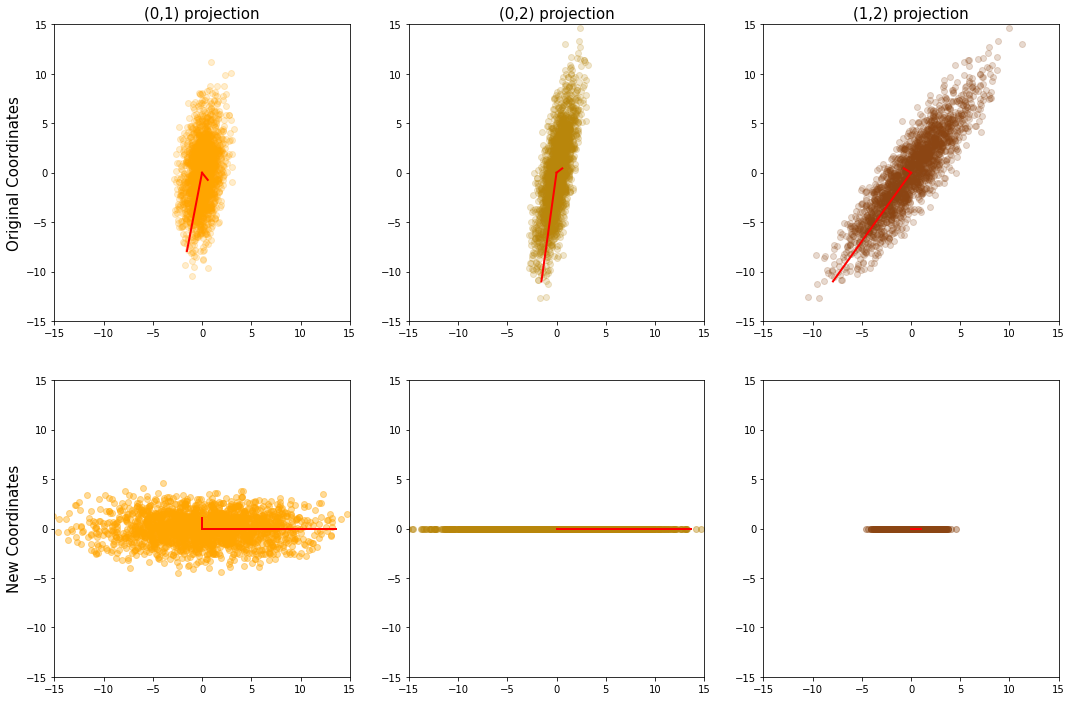

In [39]:
# 2D data (reduced dimension)
red_data=np.array([x1,x2])

#redefine data in new basis
data_p = np.dot(V_SVD.T, data)

scale=0.5

# plot data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
# scatter plot
ax1.scatter(x=x1,y=x2, color='orange', alpha=0.2,)
ax2.scatter(x=x1,y=x3, color='darkgoldenrod', alpha=0.2)
ax3.scatter(x=x2,y=x3, color='saddlebrown', alpha=0.2)
#eigenvectors
for li, vi in zip(l_SVD, V_SVD.T):
    ax1.plot([0, scale*li*vi[0]], [0, scale*li*vi[1]], 'r-', lw=2)
    ax2.plot([0, scale*li*vi[0]], [0, scale*li*vi[2]], 'r-', lw=2)
    ax3.plot([0, scale*li*vi[1]], [0, scale*li*vi[2]], 'r-', lw=2)

# scatter plot    
ax4.scatter(data_p[0,:], data_p[1,:], alpha=0.4, color='orange')
ax5.scatter(data_p[0,:], data_p[2,:], alpha=0.4, color='darkgoldenrod')
ax6.scatter(data_p[1,:], data_p[2,:], alpha=0.4, color='saddlebrown')

for li, vi in zip(l_SVD, np.diag([1,1,1])):
    ax4.plot([0, scale*li*vi[0]], [0, scale*li*vi[1]], 'r-', lw=2)
    ax5.plot([0, scale*li*vi[0]], [0, scale*li*vi[2]], 'r-', lw=2)
    ax6.plot([0, scale*li*vi[1]], [0, scale*li*vi[2]], 'r-', lw=2)

ax1.set_ylabel('Original Coordinates', fontsize=15)
ax4.set_ylabel('New Coordinates', fontsize=15)
ax1.set_title('(0,1) projection', fontsize=15)
ax2.set_title('(0,2) projection', fontsize=15)
ax3.set_title('(1,2) projection', fontsize=15)

custom_xlim = (-15, 15)
custom_ylim = (-15, 15)
plt.setp(((ax1, ax2, ax3), (ax4, ax5, ax6)), xlim=custom_xlim, ylim=custom_ylim)

fig.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standard deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [40]:
# restoring dataset
data=np.array([x1,x2,x3])
# define random std deviation
st_dev = np.random.uniform(0.005,0.04,10)
# Adding variables to dataset
for i in range(10):
    add=np.array([random.normal(0,st_dev[0],n)])
    data=np.append(data,add,axis=0)
    
# find eingenvectors and eigenvalues with scipy la
l, V = la.eig(np.cov(data))
l = np.real_if_close(l)

# find eingenvectors and eigenvalues with SVD
U, s, Vh = la.svd(data)
l_SVD = s**2/(n-1)
V_SVD = U

l.sort()
l_SVD.sort()

# Check eigenvalues
print('Are eigenvalues the same? ',all(np.isclose(l,l_SVD, rtol=1e-2)))

# Visualize principal component
print('\n Principal Components:')
l=np.flip(l)
for li in l:
    li_print = '{:.2e}'.format(li)
    li_perc_print = '{:.2f}'.format(abs(li)/(np.sum(l))*100.)
    print(li_print, '\t', li_perc_print,'%')



Are eigenvalues the same?  True

 Principal Components:
2.73e+01 	 92.98 %
2.06e+00 	 7.02 %
5.23e-05 	 0.00 %
5.05e-05 	 0.00 %
4.98e-05 	 0.00 %
4.82e-05 	 0.00 %
4.58e-05 	 0.00 %
4.47e-05 	 0.00 %
4.40e-05 	 0.00 %
4.28e-05 	 0.00 %
4.12e-05 	 0.00 %
4.06e-05 	 0.00 %
-2.59e-16 	 0.00 %


More than the 99% of the variability is explained by the first two principal components, since the noise variables have a much smaller variance.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.



 PCA for camera n. 0
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
2.67e-32 	 0.00 %

 PCA for camera n. 1
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
6.22e-34 	 0.00 %

 PCA for camera n. 2
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
3.39e-32 	 0.00 %

 PCA for camera n. 3
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
6.48e-32 	 0.00 %

 PCA for camera n. 4
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
2.33e-32 	 0.00 %

 PCA for camera n. 5
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
4.82e-33 	 0.00 %

 PCA for camera n. 6
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
7.78e-33 	 0.00 %

 PCA for camera n. 7
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
1.27e-33 	 0.00 %

 PCA for camera n. 8
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
3.03e-34 	 0.00 %

 PCA for camera n. 9
4.98e-01 	 99.92 %
4.12e-04 	 0.08 %
1.22e-32 	 0.00 %


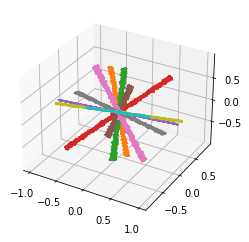

In [35]:
from math import pi

n = 1500 # number of samples
t = np.linspace(0,60,n)
x = np.sin(t)
y = np.random.normal(0,0.02,n)
z = np.zeros(n)
xyz = np.array([x,y,z])


N = 10 # number of cameras
theta = np.random.uniform(0,2*pi,N)
phi = np.random.uniform(0,pi,N)
rho = 1
data=[]

ax = plt.axes(projection='3d')


for th,ph in zip(theta,phi):
    
    # the origin of the camera
    x_cam = rho*np.sin(ph)*np.cos(th)  
    y_cam = rho*np.sin(ph)*np.sin(th)
    z_cam = rho*np.cos(ph)
    xyz_cam = np.array([x_cam,y_cam,z_cam])
    # rotation matrix
    rot_theta = np.array([[np.cos(th),np.sin(th),0],[-np.sin(th),np.cos(th),0],[0,0,1]])
    rot_phi = np.array([[1,0,0],[0,np.cos(ph),np.sin(ph)],[0,-np.sin(ph),np.cos(ph)]])
    # perform rotation 
    xyz_seen = np.matmul(np.matmul(xyz.T,rot_theta),rot_phi)
    # append data
    data.append(xyz_seen) 
    #plot data
    ax.plot3D(xyz_seen[:,0], xyz_seen[:,1], xyz_seen[:,2])
        
data=np.array(data)
#print(data.shape)

# perform PCA
i=0
for dat_i in data:
    U, s, Vh = la.svd(dat_i)
    l_SVD = s**2/(n-1)
    print('\n PCA for camera n.',i)
    for j in l_SVD:
        j_print = '{:.2e}'.format(j)
        j_perc_print = '{:.2f}'.format(abs(j)/(np.sum(l_SVD))*100.)
        print(j_print, '\t', j_perc_print,'%')
    i+=1

We can observe that, as expected, we have more than $99\%$ of variability of each dataset is explained by the first component. The second component is equal to $0.08\%$ of the total variability. The last component usually is really close to zero (about $10^{-32}$)

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 
    # DONE!

In [59]:
name=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('data/magic04.data', names=name, nrows=1000)
df = pd.DataFrame(data)
# ignore last column
df_n = df.loc[:, df.columns != 'class']

#compute covariance matrix and eigenvalues
cv = np.cov(df_n)
l, V = la.eig(cv)
l = np.real_if_close(l, tol=1) 
l_sort= sorted(l, key=abs)
l_sort.reverse()
l_sum=l.sum()
# print first 
print('Most significant principal components:')
for li in l_sort:
    if li/l_sum*100.>0.1:
        li_print = "{:.2f}".format(li)     
        li_perc_print = '{:.2f}'.format(li/l_sum*100.)
        print(li_print, '\t', li_perc_print, '%')

# change basis:
df_p = np.dot(V.T, df_n)
df_p = np.real_if_close(df_p,tol=1)
df_p = pd.DataFrame(df_p)
df_p

Most significant principal components:
3877712.59 	 91.48 %
148993.13 	 3.51 %
117409.20 	 2.77 %
46159.43 	 1.09 %
30593.32 	 0.72 %
14197.81 	 0.33 %


,0,1,2,3,4,5,6,7,8,9
0,1455.869305,594.935298,84.709292,10.482852,5.908999,-59.226521,597.373157,13.747634,451.812954,6402.284182
1,34.704225,55.017072,8.054672,0.560069,0.298257,1226.289694,318.005474,-52.696216,-16.388588,240.725141
2,-377.259351,-65.411872,0.711381,4.615938,2.658785,128.576190,-888.462923,-10.896083,402.831673,32.568572
3,-95.450796,-1.293745,7.317898,3.673196,2.101881,31.992465,394.734062,-41.759093,577.404324,88.996893
4,456.720906,187.222728,14.099921,-0.097221,-0.060169,95.205624,-35.458190,-174.679191,207.548782,-22.901424
...,...,...,...,...,...,...,...,...,...,...
995,0.094403,0.094403,0.094403,0.094403,0.094403,0.094403,0.094403,0.094403,0.094403,0.094403
996,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523
997,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523,-0.010523
998,0.029151,0.029151,0.029151,0.029151,0.029151,0.029151,0.029151,0.029151,0.029151,0.029151
